# Титаник (вариант 1)

1. Определите количество мужчин и женщин, которые ехали на корабле.


In [1]:
#  Импорт модулей для обработки данных
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import pearsonr  #  Функция возвращает коэффициент корреляции Пирсона и p-value
import scipy.stats as sts

import seaborn

%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\MrRobot\\Downloads\\WPy64-3870\\notebooks\\titanic.csv")  #  Чтение таблицы по ссылке

In [3]:
df.groupby(["Sex"])["PassengerId"].count()  #  Определение количества мужчин и женщин на корабле

Sex
female    314
male      577
Name: PassengerId, dtype: int64

2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров.


In [4]:
df[df["Survived"] == 1]["Survived"].sum()  #  Количество выживших пассажиров

342

In [5]:
df.groupby(["Survived"])["PassengerId"].count().iloc[1]/df['PassengerId'].count()  #  Доля выживших пассажиров

0.3838383838383838

3. Какую долю пассажиры первого класса составляли среди всех пассажиров?


In [6]:
passengers = df['PassengerId'].count()  #  Переменной passengers присваиваем количество пассажиров
prop_passengers_first = df.groupby(["Pclass"])["PassengerId"].count().loc[1] / passengers  #  Доля пассажиров в первом классе
print(f"Доля пассажиров в первом классе: {prop_passengers_first}")

Доля пассажиров в первом классе: 0.24242424242424243


4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров.


In [7]:
mean_age = df["Age"].mean()  #  Средний возраст пассажиров
median_age = df["Age"].median()  #  Медиана возраста пассажиров
print(f"Средний возраст пассажиров: {mean_age}\nМедиана возраста пассажиров: {median_age}")

Средний возраст пассажиров: 29.69911764705882
Медиана возраста пассажиров: 28.0


5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.


In [8]:
SibSp_ = df["SibSp"]  #  Братьев и сестер на борту
Parch_ = df["Parch"]  #  Родителей и детей на борту
r, p_value = pearsonr(SibSp_, Parch_)  #  Функция возвращает коэффициент корреляции Пирсона и p-value
print("Коэффициент корреляции Пирсона: {0}\nКоэффициент значимости p-value: {1}".format(r, p_value))

Коэффициент корреляции Пирсона: 0.4148376986201561
Коэффициент значимости p-value: 2.2418236681384912e-38


<AxesSubplot:ylabel='Density'>

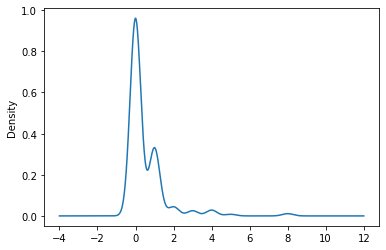

In [9]:
SibSp_.plot.kde()  #  Плотность распределения признаков SibSp

<AxesSubplot:ylabel='Density'>

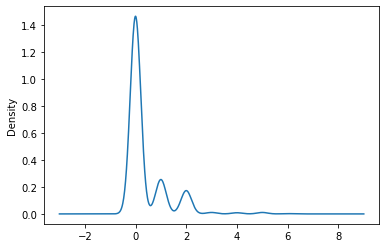

In [10]:
Parch_.plot.kde()  #  Плотность распределения признаков Parch

6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.


In [11]:
df.groupby(["Name", "Sex"])["PassengerId"].count().head()  #  Посмотрим на закономерность имен

Name                                   Sex   
Abbing, Mr. Anthony                    male      1
Abbott, Mr. Rossmore Edward            male      1
Abbott, Mrs. Stanton (Rosa Hunt)       female    1
Abelson, Mr. Samuel                    male      1
Abelson, Mrs. Samuel (Hannah Wizosky)  female    1
Name: PassengerId, dtype: int64

In [12]:
names = df["Name"][(df.Sex=="female")].apply(lambda name: name.split('.')[1].strip().split(' ')[0].strip())  #  Сортировка столбца Name по признаку fename
print(f"Количество уникальных женских имен: {names.nunique()}")  #  nunique() - Выбирает уникальные названия
tmp = dict([('name', names), ('id', range(len(names)))])  #  Создание словаря с женскими именами
names = pd.DataFrame(tmp)  #  По словарю создаем новыу таблицу с женскими именами
names_count = names.groupby(["name"]).count()  #  Группировка по именам
max_name = names_count.max()  #  Неизвестное имя, которое встретилось максимальное количество раз
tmpTableName = names_count[names_count.id == int(max_name)]  #  Таблица с именем, которое встречается максимальное количество раз
isName = list(tmpTableName.index)[0]  #  Имя, которое встречается максимальное количество раз
print (f"Женское имя {isName} встречается максимальное количество раз: {int(max_name)}")  #  Вывод информации

Количество уникальных женских имен: 203
Женское имя William встречается максимальное количество раз: 13


7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?


In [13]:
df.groupby(["Survived", "Pclass"])["Pclass"].count()  #  Видно, что погибших людей, ехавших классом 3 больше относительно 1 класса

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64

In [14]:
Unsurvived_1 = df[(df["Pclass"]==1)&(df["Survived"]==0)]  #  Погибшие 1 класса
Unsurvived_3 = df[(df["Pclass"]==3)&(df["Survived"]==0)]  #  Погибшие 3 класса
print("Погибших пассажиров 1 класса: {0}\nПогибших пассажиров 3 класса: {1}".format(Unsurvived_1["Survived"].count(), Unsurvived_3["Survived"].count()))

df_Pclass_13 = df[(df["Pclass"]>2) | (df["Pclass"]<2)]  #  Убираем 2 класс
df_Pclass_13 = df_Pclass_13["Pclass"]  #  Выбираем по признаку класса
df_Survived = df["Survived"]  #  Выбираем по признаку выживших

print("Коэффициент корреляции Пирсона: {0}\nКоэффициент значимости p-value: {1}".format(r, p_value))  #  Уровень p-value достаточно низок, что подтверждает не случайность корреляции

Погибших пассажиров 1 класса: 80
Погибших пассажиров 3 класса: 372
Коэффициент корреляции Пирсона: 0.4148376986201561
Коэффициент значимости p-value: 2.2418236681384912e-38


8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках


In [15]:
df = df.dropna()  #  Удаляем NaN
age_surv = df.drop(["PassengerId", "Pclass", "Name", "Sex", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis = "columns")  #  Удаление ненужных столбцов
age_surv_0 = age_surv[age_surv.Survived == 0]  #  Таблица возрастов невыживших пассажиров
age_surv_1 = age_surv[age_surv.Survived == 1]  #  Таблица возрастов выживших пассажиров

<AxesSubplot:xlabel='Age', ylabel='Count'>

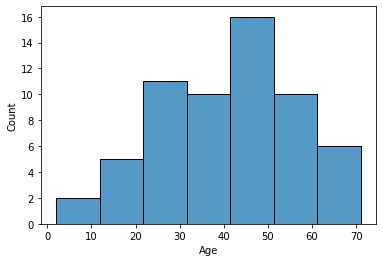

In [16]:
seaborn.histplot(age_surv_0.Age)  #  Гистограмма не выживших пассажиров seaborn

<AxesSubplot:xlabel='Age', ylabel='Count'>

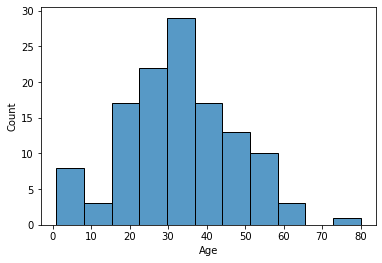

In [17]:
seaborn.histplot(age_surv_1.Age)  #  Гистограмма выживших пассажиров seaborn

__Вывод__:  по гистограмме выживших можно судить, что выживаемость была выше среди людей от 20 до 40 лет. Также видно, что выживаемость среди детей больше (так как люди стремятся спасать детей в первую очередь). Пик гистограммы погибших - люди, возраста около 40. Таким образом пик гистограммы выживших смещен по возрасту влево, относительно пика гистограммы погибших.

9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы.


In [18]:
class_surv = df.drop(["PassengerId", "Age", "Name", "Sex", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis = "columns")  #  Удаление ненужных столбцов
class_surv_0 = class_surv[class_surv.Survived == 0]  #  Таблица возрастов невыживших пассажиров
class_surv_1 = class_surv[class_surv.Survived == 1]  #  Таблица возрастов выживших пассажиров

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

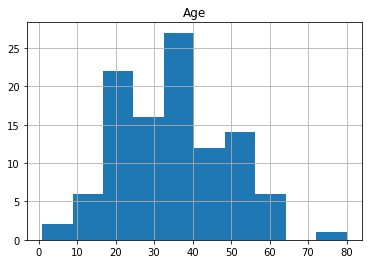

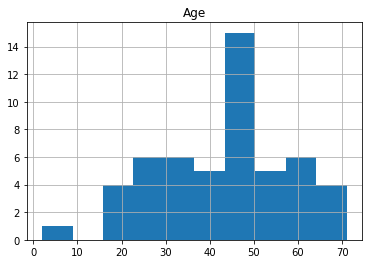

In [19]:
df.query('Survived == True and Pclass == 1')[['Age']].hist()
df.query('Survived == False and Pclass == 1')[['Age']].hist()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

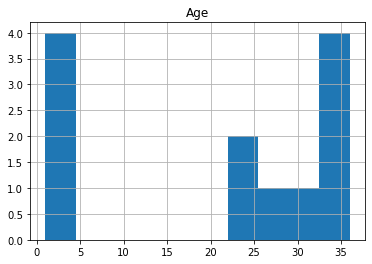

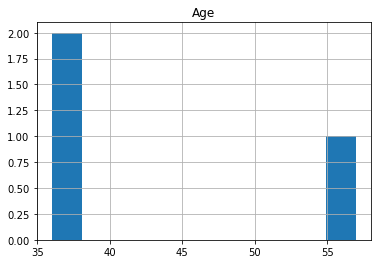

In [20]:
df.query('Survived == True and Pclass == 2')[['Age']].hist()
df.query('Survived == False and Pclass == 2')[['Age']].hist()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

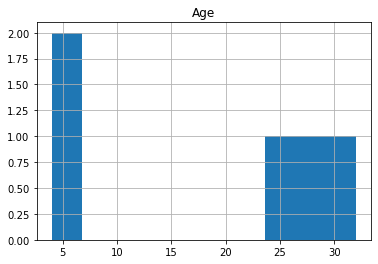

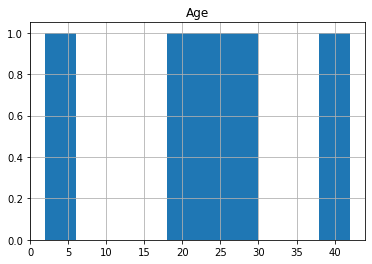

In [21]:
df.query('Survived == True and Pclass == 3')[['Age']].hist()
df.query('Survived == False and Pclass == 3')[['Age']].hist()

<AxesSubplot:>

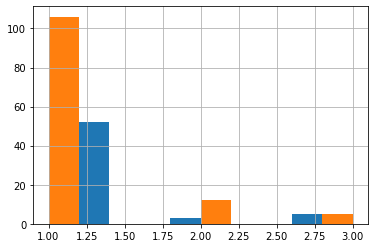

In [22]:
class_surv_0.Pclass.hist(bins = 5)  #  Гистограмма погибших и выживших по классам.
class_surv_1.Pclass.hist(bins = 10)

__Вывод__:  по гистограммам видно, что выживших 1 класса больше, чем выживших 3. Некоторые данные удалены из таблицы по причине отсутствия конкретных значений, поэтому количество людей может отличаться.

10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

<AxesSubplot:xlabel='sex', ylabel='count'>

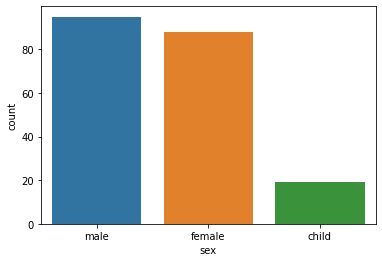

In [23]:
stolb = pd.DataFrame({'count': [len(df.loc[df.Sex == "male"]),len(df.loc[df.Sex == "female"]),len(df.query("Age < 18"))],
'sex': ["male","female","child"]})
seaborn.barplot(data=stolb, y='count', x='sex')